In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# load the diabetes dataset
diabetes = datasets.load_diabetes()


In [14]:
dir(diabetes)
#type(diabetes)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [7]:
diabetes.data_filename

'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\diabetes_data.csv.gz'

In [8]:
print(diabetes.data.shape)

(442, 10)


In [9]:
print(diabetes.target.shape)

(442,)


In [12]:
import pandas as pd
diabetes_df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)

In [15]:
diabetes_df['target'] = diabetes.target

In [16]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [21]:
diabetes_df.shape

(442, 11)

In [18]:
X = diabetes_df.iloc[:, :-1]
y = diabetes_df.target

In [20]:
X.shape, y.shape

((442, 10), (442,))

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25)

In [24]:
xtrain.shape, xtest.shape

((331, 10), (111, 10))

In [25]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [26]:
# fitting the training data
lr_model.fit(xtrain, ytrain)

LinearRegression()

In [27]:
# predicting using our model
y_predicted = lr_model.predict(xtest)

In [54]:
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(ytest, y_predicted))
print(r2_score(y_predicted, ytest))

0.503307140252331
-0.044251678356032276


In [46]:
print(lr_model.score(xtest, ytest))
print(lr_model.score(xtrain, ytrain))

0.503307140252331
0.5155428261113189


In [30]:
mean_squared_error(ytest, y_predicted)

2580.461750556639

In [33]:
# coeff and intercept
print(X.columns)
print("coeff is: ", lr_model.coef_)
print('intercept is: ', lr_model.intercept_)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
coeff is:  [  43.77020528 -187.01188141  524.04582201  307.94691181 -630.13056837
  284.1610702     6.83778913  155.45314524  641.73890563  102.72599896]
intercept is:  152.34722201917168


In [42]:
result = pd.DataFrame({'Actual': ytest, 'Predicted' : y_predicted})

In [43]:
result

,Actual,Predicted
310,109.0,202.383420
80,143.0,169.189296
158,96.0,82.262032
312,144.0,118.699874
6,138.0,79.007043
...,...,...
64,71.0,125.719137
193,116.0,138.729515
253,150.0,202.383865
25,202.0,145.653817


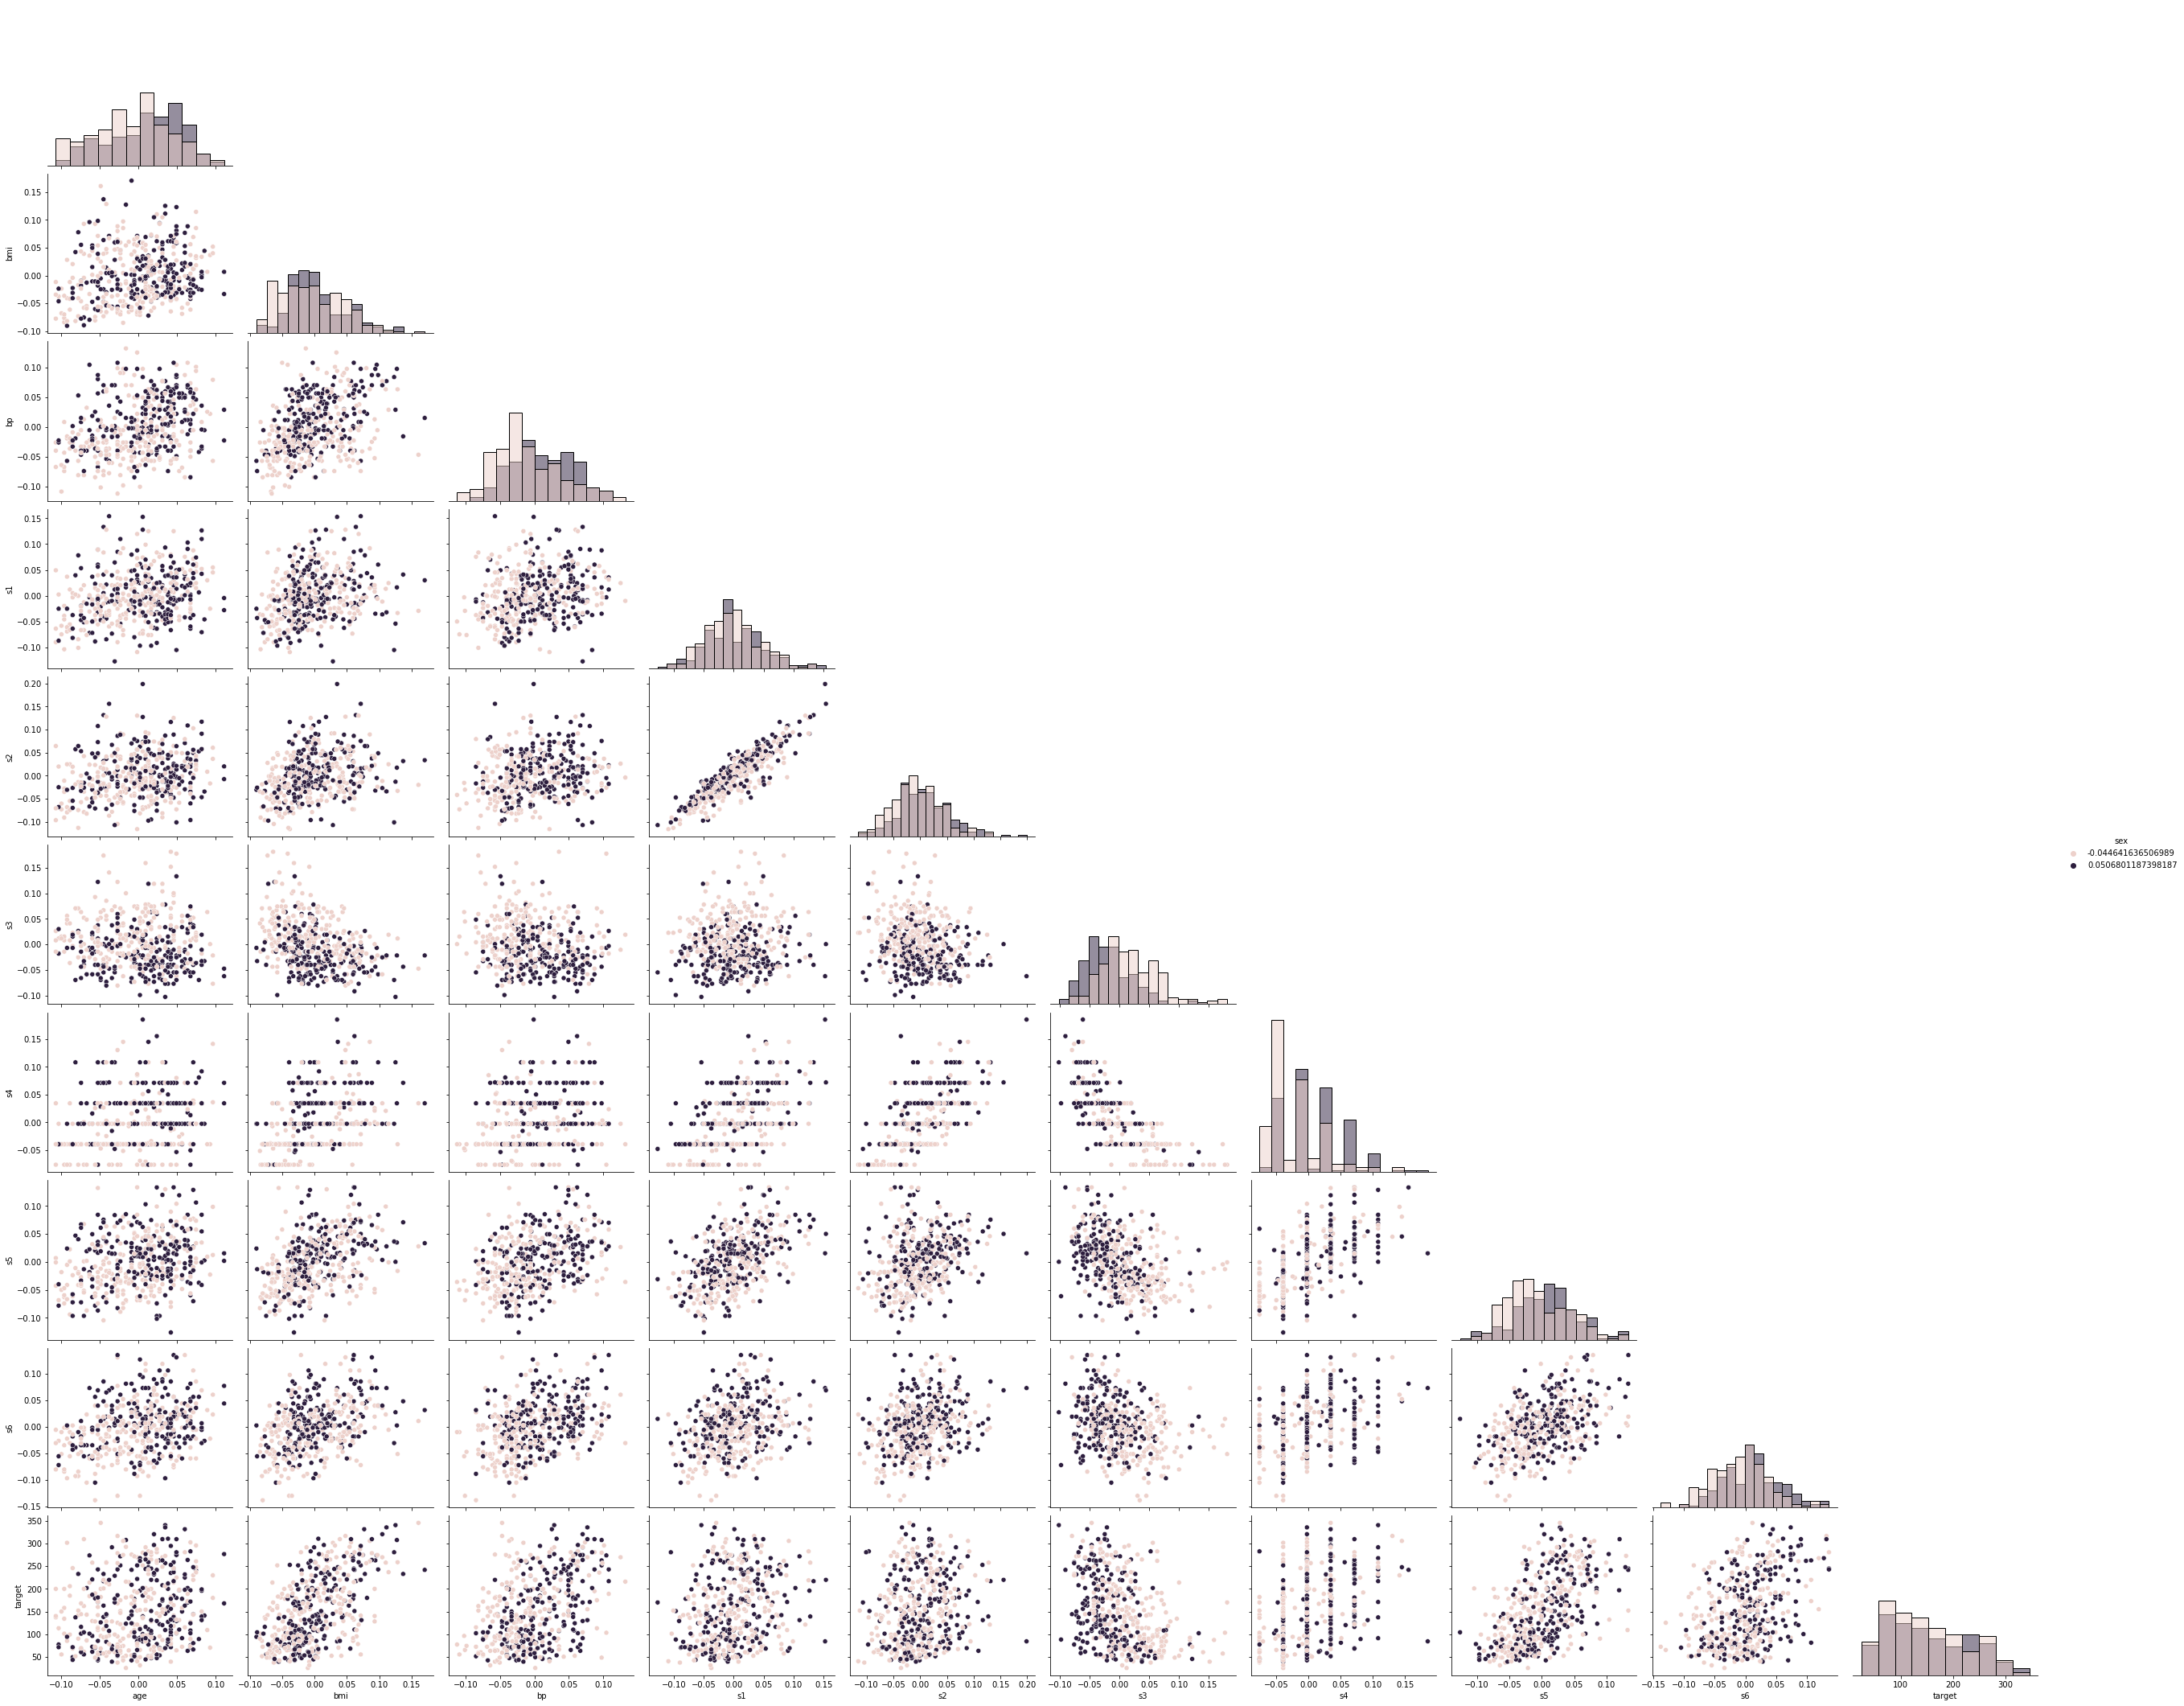

In [47]:
import seaborn as sns
sns.pairplot(diabetes_df, diag_kind = 'hist', hue = 'sex', height = 3, aspect = 1.2, corner = True);

In [48]:
corr = diabetes_df.corr()

In [49]:
corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


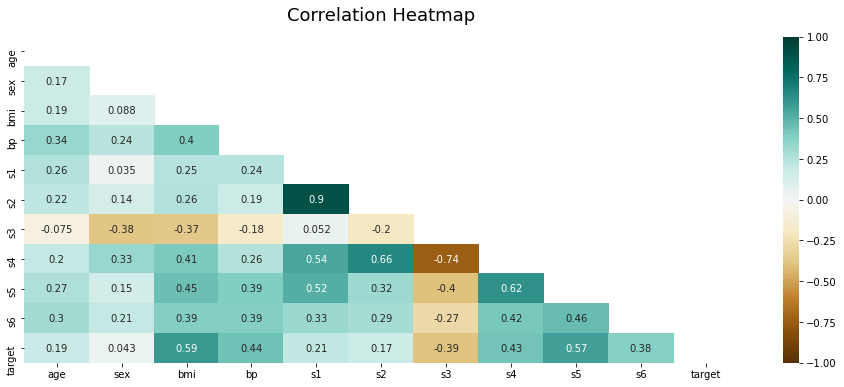

In [51]:
plt.figure(figsize = (16,6))
mask = np.triu(np.ones_like(corr, dtype = np.bool))  #--> this masks the upper triangle of the corr matrix
heatmap = sns.heatmap(corr, vmin = -1, vmax = 1, mask = mask, cmap = 'BrBG', annot = True)
heatmap.set_title('Correlation Heatmap', fontdict ={'fontsize': 18}, pad = 16);